# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

### Question 1
The data go wrong because there's some abnormal values like 704000. This is caused because the total items here is 2000, and others are only 1-5.

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("orders.csv")

In [3]:
df.head()

,order_id,shop_id,user_id,order_value,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


<AxesSubplot: title={'center': 'Calories Distrbution of order value'}, ylabel='Frequency'>

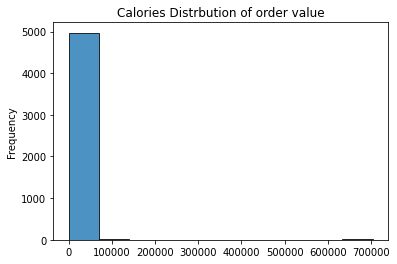

In [4]:
df["order_value"].plot.hist(edgecolor='black', alpha=0.8, title="Calories Distrbution of order value")

We can see that a few outliers make the data terrible.

### Question 2
We can introduce a new metric, order value per item.

In [5]:
df["order_value_per_item"]=df["order_value"]/df["total_items"]

In [6]:
df["order_value_per_item"].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: order_value_per_item, dtype: float64

<AxesSubplot: title={'center': 'Calories Distrbution of order value per item'}, ylabel='Frequency'>

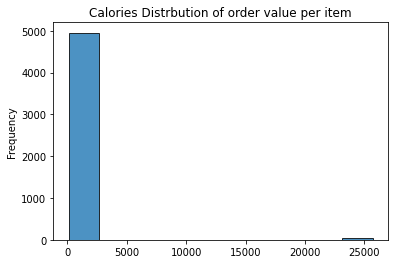

In [7]:
df["order_value_per_item"].plot.hist(edgecolor='black', alpha=0.8, title="Calories Distrbution of order value per item")

It's reasonable to simply drop the strange data at 25000. It's very likely to be caused by accident.

<AxesSubplot: title={'center': 'Calories Distrbution of order value per item'}, ylabel='Frequency'>

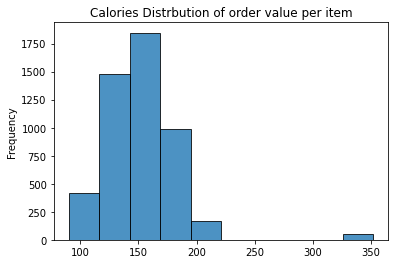

In [8]:
df_clear = df.drop(df[df['order_value_per_item']>5000].index)
df_clear["order_value_per_item"].plot.hist(edgecolor='black', alpha=0.8, title="Calories Distrbution of order value per item")

Now the situation becomes clearer. We do the statistic calculation.

In [9]:
df_clear["order_value_per_item"].describe()

count    4954.000000
mean      152.475575
std        31.260218
min        90.000000
25%       132.000000
50%       153.000000
75%       168.000000
max       352.000000
Name: order_value_per_item, dtype: float64

### Question 3
From observation, all the purchase happens at 2017-3. We propose 2 hypotheses:
1. The order value per item depends on the time in one day
2. The order value per item depends on the date

We need to parse the timestamp, so we define two functions:

In [17]:
def get_date(time:str):  # 2017-03-13 12:36:56 -> 13
    parts=time.split(' ')
    dates=parts[0]
    date_list=dates.split('-')
    return int(date_list[2])

def get_second(time:str):  # 2017-03-13 12:36:56 -> 12*3600+36*60+56
    parts=time.split(' ')
    time=parts[1]
    time_list=time.split(':')
    return int(time_list[0])*3600+int(time_list[1])*60+int(time_list[2])

Now create two batches of feature vector and one output vector

In [19]:
all_date=df_clear["created_at"]
X1=list(map(get_date, all_date))
X2=list(map(get_second, all_date))
Y=list(df_clear["order_value_per_item"])

We only want to do a simple linear regression.

First one:

In [12]:
import scipy.stats as st
slope, intercept, r_value, p_value, std_err = st.linregress(X1, Y)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
print(slope, intercept, r_value, p_value, std_err)

-0.07634506386825413 153.65295980612328 -0.021363662448000854 0.13271887103184993 0.05077101051610933


Take p-value threshold to be 0.05, the regression is not significant ($p=0.13$). $R^2$ is also very close to 0. We do not even want to plot out the figure!

In [20]:
slope, intercept, r_value, p_value, std_err = st.linregress(X2, Y)
print(slope, intercept, r_value, p_value, std_err)

-1.410846782514881e-05 153.0798987762002 -0.011333458485616676 0.42514566479386007 1.7688833015487807e-05


It turns out that there's no significant relationship either.

Conclusion: there's no significant relationship between time and order value per item.